# Dataset import and exploration
- https://www.kaggle.com/shelvigarg/wine-quality-dataset

In [2]:
import numpy as np
import pandas as pd 

df = pd.read_csv('tensor_data/winequalityN.csv')
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6180,red,7.9,0.765,0.00,2.00,0.084,9.0,22.0,0.99619,3.33,0.68,10.9,6
5916,red,8.0,0.180,0.37,0.90,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6
5179,red,7.7,0.270,0.68,3.50,0.358,5.0,10.0,0.99720,3.25,1.08,9.9,7
5622,red,7.5,1.115,0.10,3.10,0.086,5.0,12.0,0.99580,3.54,0.60,11.2,4
3209,white,6.4,0.210,0.34,16.05,0.040,56.0,142.0,0.99678,3.11,0.38,10.6,5


In [3]:
df.shape

(6497, 13)

In [4]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### Drop missing values:

In [5]:
df = df.dropna()
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Encode string data:

In [6]:
df['type'].value_counts()

white    4870
red      1593
Name: type, dtype: int64

In [7]:
df['is_white_wine'] = [1 if typ == 'white' else 0 for typ in df['type']]
df.drop('type', axis=1, inplace=True)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_white_wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


### All data is numeric now:

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
is_white_wine             int64
dtype: object

<br>

# Convert to a binary classification problem
- This is not a binary classification problem by default
- We can make it one by declaring wines above some quality point good wines and rest of them bad wines

In [9]:
df['quality'].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

- So we'll have 63.3% good wines and the rest are bad

In [10]:
len(df[df['quality'] >= 6]) / len(df)

0.6329877765743462

In [11]:
df['is_good_wine'] = [1 if quality >= 6 else 0 for quality in df['quality']]
df.drop('quality', axis=1, inplace=True)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white_wine,is_good_wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


In [12]:
df['is_good_wine'].value_counts()

1    4091
0    2372
Name: is_good_wine, dtype: int64

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white_wine,is_good_wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


<br>

# Train/Test split

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('is_good_wine', axis=1)
y = df['is_good_wine']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=42
)

In [17]:
X_train.shape, X_test.shape

((5170, 12), (1293, 12))

In [18]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white_wine
459,6.1,0.43,0.35,9.1,0.059,83.0,249.0,0.99710,3.37,0.50,8.500000,1
1460,8.5,0.17,0.74,3.6,0.050,29.0,128.0,0.99280,3.28,0.40,12.400000,1
4403,5.2,0.22,0.46,6.2,0.066,41.0,187.0,0.99362,3.19,0.42,9.733333,1
3828,6.3,0.40,0.24,5.1,0.036,43.0,131.0,0.99186,3.24,0.44,11.300000,1
4317,6.7,0.34,0.26,1.9,0.038,58.0,138.0,0.98930,3.00,0.47,12.200000,1


<br>

# Data scaling
- Input features aren't on the same scale, so we'll fix it quickly:

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled[:3]

array([[-0.86265684,  0.56588915,  0.22079121,  0.75048207,  0.07674805,
         2.9415276 ,  2.35882933,  0.788386  ,  0.94784355, -0.20357893,
        -1.66472797,  0.57094748],
       [ 0.99186667, -1.02945526,  2.92098728, -0.3929423 , -0.17512717,
        -0.08344183,  0.21383119, -0.64578381,  0.38700578, -0.87653487,
         1.63149383,  0.57094748],
       [-1.55810316, -0.72265826,  0.98238498,  0.14758559,  0.27265101,
         0.5887736 ,  1.25973937, -0.37229096, -0.17383198, -0.74194369,
        -0.62233304,  0.57094748]])

<br>

# Model training

In [21]:
import tensorflow as tf

- This is a completely random neural network architecture
- Use `sigmoid` as the activation function in the last layer when working with binary classification problems
- Use `binary_crossentropy` as a loss function when working with binary classification problems
- We'll track accuracy, precision, and recall and train for 100 epochs

In [22]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
162/162 [==============================] - 4s 5ms/step - loss: 0.5256 - accuracy: 0.7402 - precision: 0.7735 - recall: 0.8351
Epoch 2/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4932 - accuracy: 0.7675 - precision: 0.8029 - recall: 0.8396
Epoch 3/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4762 - accuracy: 0.7791 - precision: 0.8102 - recall: 0.8512
Epoch 4/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4608 - accuracy: 0.7838 - precision: 0.8237 - recall: 0.8387
Epoch 5/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4502 - accuracy: 0.7896 - precision: 0.8243 - recall: 0.8494
Epoch 6/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4401 - accuracy: 0.7932 - precision: 0.8270 - recall: 0.8524
Epoch 7/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4298 - accuracy: 0.8000 - precision: 0.8338 - recall: 0.8552
Epoch 8/100
162/162 [=============

<br>

# Model performance visualization

In [25]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

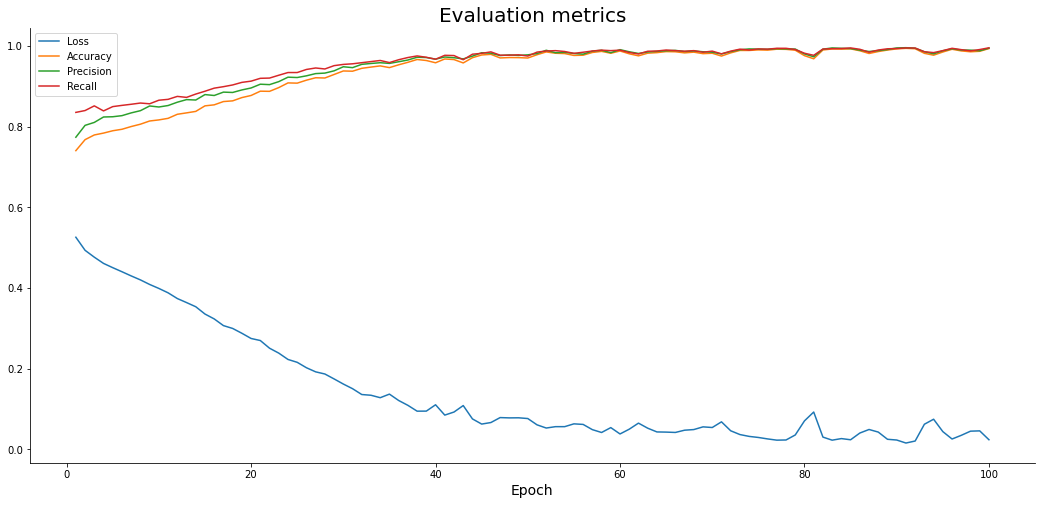

In [26]:
plt.plot(np.arange(1, 101), history.history['loss'], label='Loss')
plt.plot(np.arange(1, 101), history.history['accuracy'], label='Accuracy')
plt.plot(np.arange(1, 101), history.history['precision'], label='Precision')
plt.plot(np.arange(1, 101), history.history['recall'], label='Recall')
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

- You could keep training the model, as accuracy, precision, and recall seem to grow slightly

<br>

# Making predictions

In [28]:
predictions = model.predict(X_test_scaled)
predictions

41/41 [==============================] - 0s 2ms/step


array([[0.0054092 ],
       [0.9957015 ],
       [0.9999946 ],
       ...,
       [0.99735326],
       [0.97291625],
       [0.0184698 ]], dtype=float32)

- These are probabilities - here's how to convert them to classes (threshold = 0.5)

In [29]:
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]
print(prediction_classes[:20])

[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1]


<br>

# Model evaluation

- Evaluation on the test set:

In [32]:
loss, accuracy, precision, recall = model.evaluate(X_test_scaled, y_test)
loss, accuracy, precision, recall

41/41 [==============================] - 0s 3ms/step - loss: 1.5148 - accuracy: 0.8067 - precision: 0.8459 - recall: 0.8459


(1.514756679534912, 0.8066511750221252, 0.8458693027496338, 0.8458693027496338)

In [33]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

[[357 125]
 [125 686]]


- 383 True Negatives, 597 True positives, 214 False negatives, 99 False positives
- Further evaluation:

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy:  {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall:    {recall_score(y_test, prediction_classes):.2f}')

Accuracy:  0.81
Precision: 0.85
Recall:    0.85


# Predicting One or Two single records - Personal Consumption

In [97]:
# Load library
import pandas as pd

In [98]:
# Create DataFrame
dataframe = pd.DataFrame()

In [99]:
# Add columns

dataframe['type'] = ['white', 'red']
dataframe['fixed acidity'] = [7.0, 6.3]
dataframe['volatile acidity'] = [0.27, 0.30]
dataframe['citric acid'] = [0.36, 0.34]
dataframe['residual sugar'] = [20.7, 1.6]
dataframe['chlorides'] = [0.045, 0.049]
dataframe['free sulfur dioxide'] = [45.0, 14.0]
dataframe['total sulfur dioxide'] = [170.0, 132.0]
dataframe['density'] = [1.001, 0.994]
dataframe['pH'] = [3.0, 3.3]
dataframe['sulphates'] = [0.45, 0.49]
dataframe['alcohol'] = [8.8, 9.5]
dataframe['quality'] = [6, 6]

In [100]:
# Show DataFrame
dataframe

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,red,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [101]:
dataframe['is_white_wine'] = [1 if typ == 'white' else 0 for typ in dataframe['type']]
dataframe.drop('type', axis=1, inplace=True)

dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_white_wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,0


In [102]:
dataframe['is_good_wine'] = [1 if quality >= 6 else 0 for quality in dataframe['quality']]
dataframe.drop('quality', axis=1, inplace=True)

dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white_wine,is_good_wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,0,1


In [103]:
# splitting into feature and target variables

X_features = dataframe.drop('is_good_wine', axis=1)
y_target = dataframe['is_good_wine']

In [104]:
# viewing X independent or feature variables

X_features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white_wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,0


In [105]:
# viewing the target variable

y_target

0    1
1    1
Name: is_good_wine, dtype: int64

In [106]:
# Preprocessing and scaling

In [107]:
# Let us scale our X_features based on scale fitting to X_train

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_features_scaled = scaler.transform(X_features)

In [108]:
X_features_scaled

array([[-0.16721052, -0.41586126,  0.29002701,  3.16206802, -0.31505785,
         0.81284541,  0.958376  ,  2.08914467, -1.35782282, -0.5400569 ,
        -1.41117244,  0.57094748],
       [-0.70811321, -0.23178306,  0.15155542, -0.80873298, -0.20311331,
        -0.92371111,  0.28474021, -0.24555037,  0.51163639, -0.27087453,
        -0.81954289, -1.7514746 ]])

In [109]:
my_predictions = model.predict(X_features_scaled)
my_predictions

1/1 [==============================] - 0s 47ms/step


array([[0.9997431 ],
       [0.03444249]], dtype=float32)

In [110]:
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(my_predictions)]
print(prediction_classes)

[1, 0]
